<a href="https://colab.research.google.com/github/minhducvo04/PyTorch-models/blob/main/PyTorch_Model_For_Quadratic_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SETUP THE ENVIRONMENT

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

torch.__version__

'1.13.0+cu116'

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU available, the code will default to using CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


##DATA

In [ ]:
# Create data by using the data regression formula of y= weight * X + bias

weight = 2 * math.pi
bias = math.exp(1)
weight, bias

(6.283185307179586, 2.718281828459045)

In [ ]:
# Create range values
start = 0
end = 1
step = 0.01

In [ ]:
# Create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) #w/o unsqueeze -> errors
y = weight * X + bias
y1 = 25*X*X + weight*X + bias
z = weight * y * X + bias
X[-10:], y[-10:], z[-10:], y1

(tensor([[0.9000],
         [0.9100],
         [0.9200],
         [0.9300],
         [0.9400],
         [0.9500],
         [0.9600],
         [0.9700],
         [0.9800],
         [0.9900]]), tensor([[8.3731],
         [8.4360],
         [8.4988],
         [8.5616],
         [8.6245],
         [8.6873],
         [8.7501],
         [8.8130],
         [8.8758],
         [8.9386]]), tensor([[50.0673],
         [50.9527],
         [51.8459],
         [52.7471],
         [53.6561],
         [54.5730],
         [55.4979],
         [56.4306],
         [57.3712],
         [58.3198]]), tensor([[ 2.7183],
         [ 2.7836],
         [ 2.8539],
         [ 2.9293],
         [ 3.0096],
         [ 3.0949],
         [ 3.1853],
         [ 3.2806],
         [ 3.3809],
         [ 3.4863],
         [ 3.5966],
         [ 3.7119],
         [ 3.8323],
         [ 3.9576],
         [ 4.0879],
         [ 4.2233],
         [ 4.3636],
         [ 4.5089],
         [ 4.6593],
         [ 4.8146],
         [ 4.9749

In [ ]:
# Split data
train_split = int(0.75 * len(X))
X_train, y_train, z_train, X_test, y_test, z_test = X[:train_split], y[:train_split], z[:train_split], X[train_split:], y[train_split:], z[train_split:]
y1_train, y1_test = y1[:train_split], y1[train_split:]
len(X_train), len(y_train), len(z_train), len(X_test), len(y_test), len(z_test), len(y1_train), len(y1_test)

(75, 75, 75, 25, 25, 25, 75, 25)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y1_train,
                     test_data = X_test,
                     test_labels = y1_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize = (5,5))
  #Plt training data in blue
  plt.scatter(train_data,train_labels, c="b",s=4, label = "Training data")
  #Plt test data in yellow
  plt.scatter(test_data,test_labels, c="g",s=4, label = "Testing data")
  #Are there prediction?
  if predictions is not True and predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label = "Predictions")
    #Show the legend
    plt.legend(prop={"size": 10});


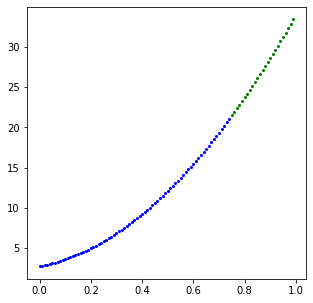

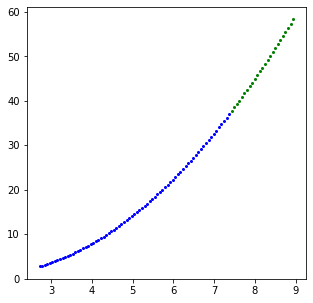

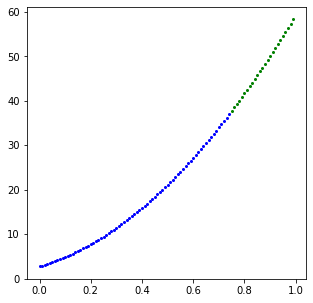

In [ ]:
plot_predictions(X_train, y1_train, X_test, y1_test)
plot_predictions(y_train, z_train, y_test, z_test)
plot_predictions(X_train, z_train, X_test, z_test)

In [ ]:
# Create a linear model by subclassing nn.Module (for y)
#class LinearRegressionModelV2(nn.Module):
#  def __init__(self):
#    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
#    self.linear_layer = nn.Linear(in_features=1,
#                                      out_features=1)
#  def forward(self, x: torch.Tensor) -> torch.Tensor:
#    return self.linear_layer(x)
#Create linear regression model class (for z)
class LinearRegressionModelV2(nn.Module): #Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))
  #Forward method to defind the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return 25 * x * x + self.weights * x + self.bias #this is the linear regression formula

In [ ]:
# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(),
 OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))]))

## Training
We need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(lr = 0.01,
                            params = model_1.parameters())

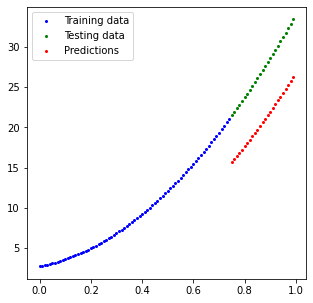

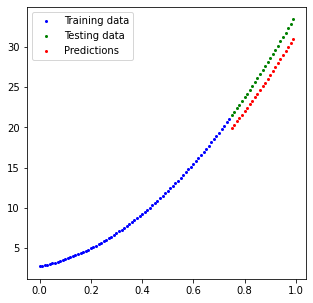

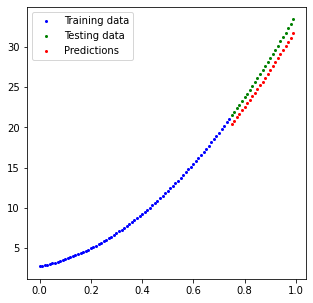

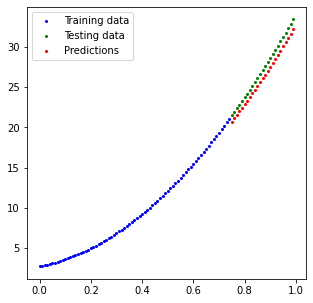

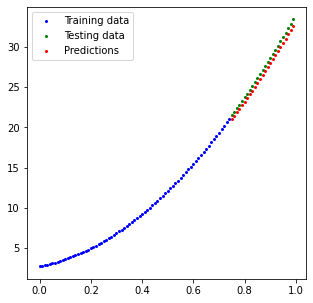

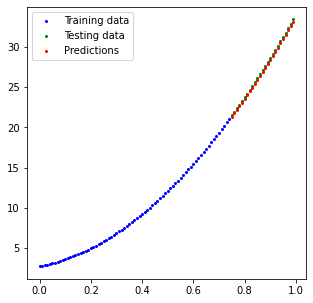

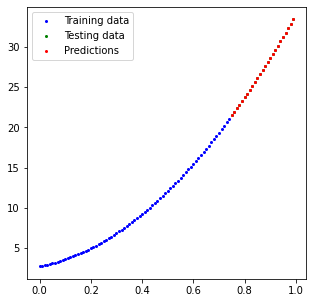

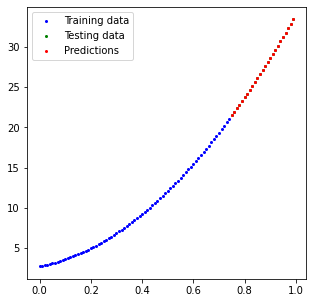

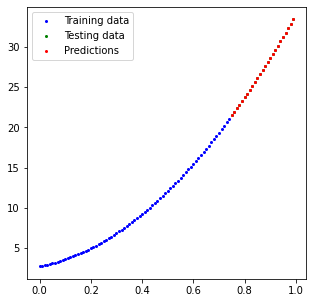

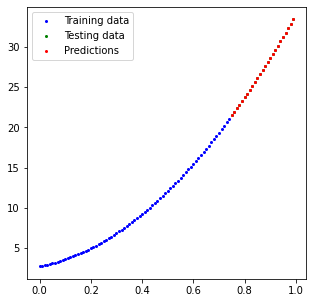

In [ ]:
# Training loop
torch.manual_seed(42)

epochs = 5000

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y1_pred = model_1(X_train)

  # 2. Calcualte the loss
  loss = loss_fn(y1_pred, y1_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y1_test)

  ### Print out what's happening
  #if epoch % 5000 == 0:
  #  print(f"Epoch: {epoch} || Lost: {loss} || Test loss: {test_loss}")

  ### Graphing
  if epoch % 500 == 0:
    with torch.inference_mode():
      y1_preds = model_1(X_test)
    plot_predictions(predictions = y1_preds)

In [ ]:
model_1.state_dict(), weight, bias

(OrderedDict([('weights', tensor([6.2828])), ('bias', tensor([2.7267]))]),
 6.283185307179586,
 2.718281828459045)

In [ ]:
#Create linear regression model class (for z)
class LinearRegressionModelV3(nn.Module): #Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))
  #Forward method to defind the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * self.weights * x * x + self.bias * self.weights * x + self.bias #this is the linear regression formula

In [ ]:
# Set manual seed
torch.manual_seed(7)
model_2 = LinearRegressionModelV3()
model_2, model_2.state_dict()

(LinearRegressionModelV3(),
 OrderedDict([('weights', tensor([0.5349])), ('bias', tensor([0.1988]))]))

In [ ]:
# Setup loss function
loss_fn_fake = nn.MSELoss()

# Setup our optimizer
optimizer_fake = torch.optim.SGD(lr = 0.0001,
                            params = model_2.parameters())

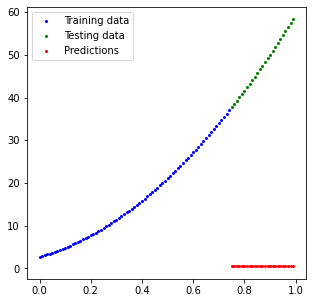

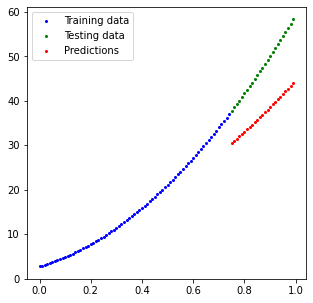

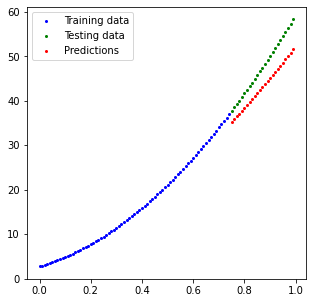

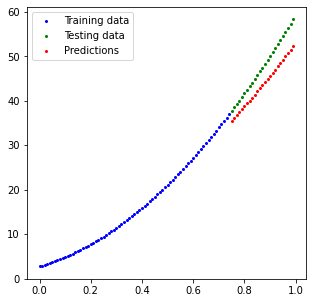

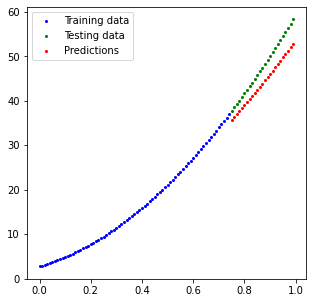

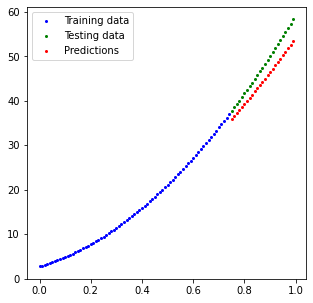

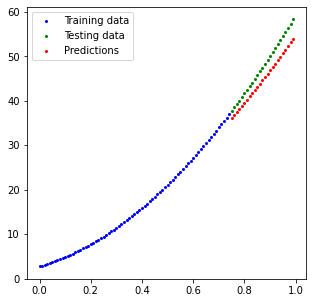

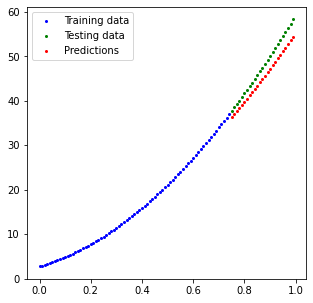

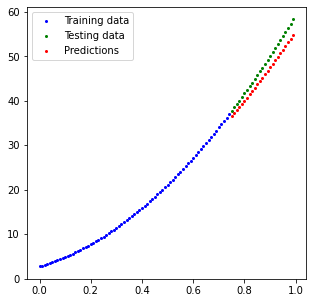

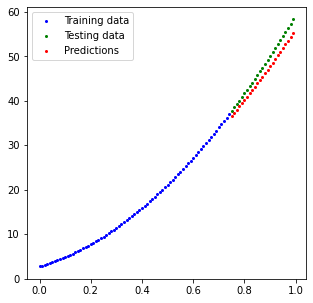

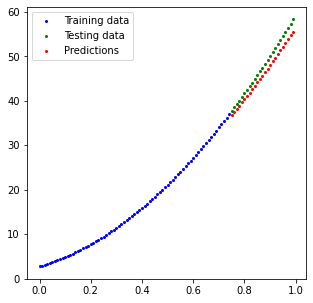

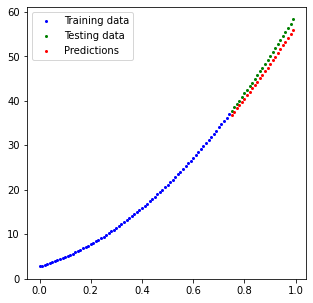

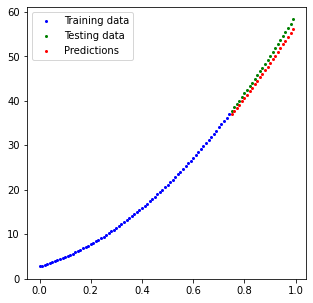

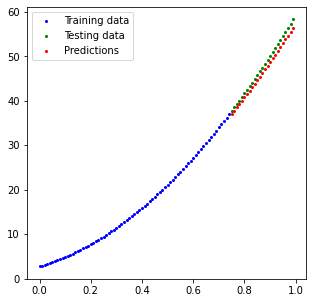

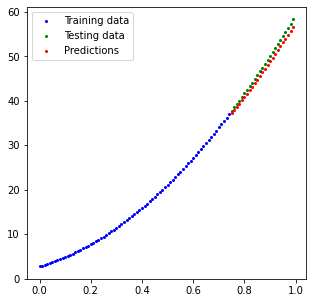

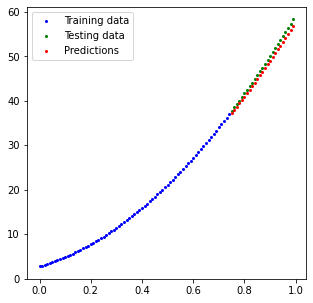

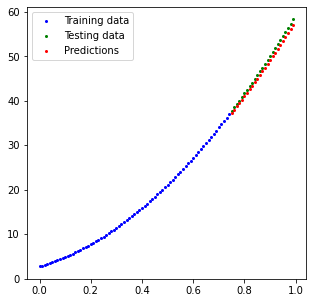

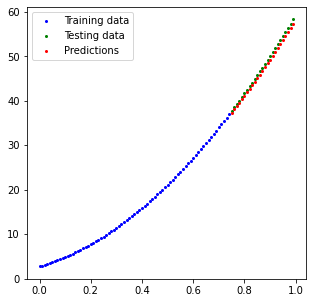

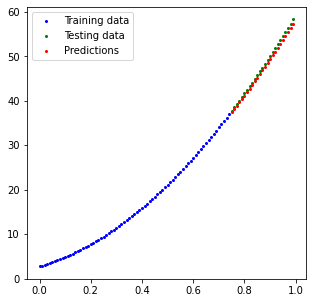

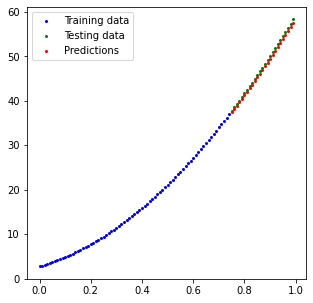

In [ ]:
# Training loop
torch.manual_seed(7)

epochs = 20000

for epoch in range(epochs):
  model_2.train()

  # 1. Forward pass
  z_pred = model_2(X_train)

  # 2. Calcualte the loss
  loss_fake = loss_fn_fake(z_pred, z_train)

  # 3. Optimizer zero grad
  optimizer_fake.zero_grad()

  # 4. Perform backpropagation
  loss_fake.backward()

  # 5. Optimizer step
  optimizer_fake.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred_fake = model_2(X_test)

    test_loss_fake = loss_fn_fake(test_pred_fake, z_test)

  ### Print out what's happening
  #if epoch % 1000 == 0:
    #print(f"Epoch: {epoch} || Lost: {loss} || Test loss: {test_loss}")

  ### Graphing & making predictions
  if epoch % 1000 == 0:
    with torch.inference_mode():
      z_preds = model_2(X_test)
    plot_predictions(train_labels = z_train, test_labels = z_test,predictions = z_preds)

In [ ]:
list(model_2.parameters()), model_2.state_dict(), model_2

([Parameter containing:
  tensor([6.1644], requires_grad=True), Parameter containing:
  tensor([2.8609], requires_grad=True)],
 OrderedDict([('weights', tensor([6.1644])), ('bias', tensor([2.8609]))]),
 LinearRegressionModelV3())